In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

In [3]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT NOT NULL,
        quantity INTEGER NOT NULL,
        price REAL NOT NULL
    )
''')

In [4]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT NOT NULL,
        quantity INTEGER NOT NULL,
        price REAL NOT NULL
    )
''')

In [5]:
try:
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS sales (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            product TEXT NOT NULL,
            quantity INTEGER NOT NULL,
            price REAL NOT NULL
        )
    ''')
except sqlite3.Error as e:
    print("Error creating table:", e)

In [6]:
cursor.execute('SELECT COUNT(*) FROM sales')
if cursor.fetchone()[0] == 0:
    sample_data = [
        ('Product A', 10, 5.0),
        ('Product B', 20, 7.5),
        ('Product C', 15, 6.0),
        ('Product A', 5, 5.0),
        ('Product B', 10, 7.5),
        ('Product C', 5, 6.0)
    ]
    try:
        cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
        conn.commit()
    except sqlite3.Error as e:
        print("Error inserting data:", e)

In [7]:
query = '''
    SELECT product,
           SUM(quantity) AS total_qty,
           SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
'''

In [8]:
df = pd.read_sql_query(query, conn)
print("Sales Summary:\n", df)

Sales Summary:
      product  total_qty  revenue
0  Product A         15     75.0
1  Product B         30    225.0
2  Product C         20    120.0


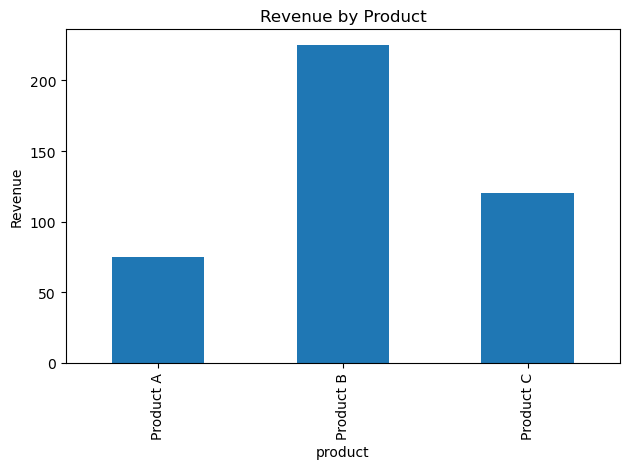

In [9]:
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title('Revenue by Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig('sales_chart.png')
plt.show()